In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


red_wine_data = pd.read_csv('red.csv')

# Creating new column
red_wine_data['good_quality'] = red_wine_data['quality'].apply(lambda x: 1 if x >= 7 else 0)

red_wine_data = red_wine_data.drop('quality', axis=1)



In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = red_wine_data.drop('good_quality', axis=1)
y = red_wine_data['good_quality']

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# data pre-processing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(y_train)

[[ 0.21833164  0.88971201  0.19209222 ...  1.09349989  0.45822284
   1.12317723]
 [-1.29016623 -1.78878251  0.65275338 ... -0.40043872 -0.40119696
   1.40827174]
 [ 1.49475291 -0.78434707  1.01104539 ... -0.07566946  0.51551749
  -0.58738978]
 ...
 [-0.65195559  0.49909822 -1.08752211 ...  1.28836145 -0.68767023
  -0.87248428]
 [-0.24582155 -1.84458448  0.39683051 ...  0.05423824  0.80199076
   1.40827174]
 [-1.46422367 -1.34236676 -0.06383064 ...  0.50891521 -0.68767023
   2.92877575]]
493     0
354     0
342     0
834     0
705     0
       ..
1130    0
1294    0
860     0
1459    1
1126    0
Name: good_quality, Length: 1279, dtype: int64


LOGISTIC REGRESSION

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


logistic_model = LogisticRegression(random_state=45)

# train
logistic_model.fit(X_train, y_train)

# predict
logistic_predictions = logistic_model.predict(X_test)

# checking accuracy
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_f1_score = f1_score(y_test, logistic_predictions)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression F1 Score:", logistic_f1_score)


Logistic Regression Accuracy: 0.865625
Logistic Regression F1 Score: 0.37681159420289856


KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

# train
knn_model.fit(X_train, y_train)

# predict
knn_predictions = knn_model.predict(X_test)

# checking accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_f1_score = f1_score(y_test, knn_predictions)

print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("K-Nearest Neighbors F1 Score:", knn_f1_score)


K-Nearest Neighbors Accuracy: 0.88125
K-Nearest Neighbors F1 Score: 0.5128205128205128


DECISION TREE CLASSIFIER

In [69]:
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state=28)

# train
dt_model.fit(X_train, y_train)

# predict
dt_predictions = dt_model.predict(X_test)

# checking accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_f1_score = f1_score(y_test, dt_predictions)

print("Decision Trees Accuracy:", dt_accuracy)
print("Decision Trees F1 Score:", dt_f1_score)


Decision Trees Accuracy: 0.8875
Decision Trees F1 Score: 0.6170212765957447


RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=92)

# training
rf_model.fit(X_train, y_train)

# predict
rf_predictions = rf_model.predict(X_test)

# checking accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1 Score:", rf_f1_score)


Random Forest Accuracy: 0.915625
Random Forest F1 Score: 0.6666666666666666


LOGESTIC REGRESSIION FROM SCRATCH

In [71]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", y_test.shape)


Shape of X_train :  (1279, 11)
Shape of Y_train :  (1279,)
Shape of X_test :  (320, 11)
Shape of Y_test :  (320,)


In [73]:
X_tr=X_train.T
X_te=X_test.T
y_tr=y_train.reshape(1,X_train.shape[0])
y_te=y_test.reshape(1,X_test.shape[0])

In [74]:
print("Shape of new X_train : ", X_tr.shape)
print("Shape of new Y_train : ", y_tr.shape)
print("Shape of new X_test : ", X_te.shape)
print("Shape of new Y_test : ", y_te.shape)

Shape of new X_train :  (11, 1279)
Shape of new Y_train :  (1, 1279)
Shape of new X_test :  (11, 320)
Shape of new Y_test :  (1, 320)


In [34]:
def sigmoid(x):
 return 1/(1 + np.exp(-x))

In [76]:
def model(X, Y, learning_rate, iterations):
 
 m = X_tr.shape[1]
 n = X_tr.shape[0]
 
 W = np.zeros((n,1))
 B = 0
 
 L=[]
 
 for i in range(iterations):
 
    Z = np.dot(W.T, X) + B
    y_p = sigmoid(Z)
 
    # cost function
    cost = -(1/m)*np.sum( Y*np.log(y_p) + (1-Y*np.log(1-y_p)))
 
    # Gradient Descent
    dW = (1/m)*np.dot(y_p-Y, X.T)
    dB = (1/m)*np.sum(y_p - Y)
 
    W = W - learning_rate*dW.T
    B = B - learning_rate*dB
 
    L.append(cost)
    if(i%(iterations/10) == 0):
        print("cost after ", i, "iteration is : ", cost)
 
 return W, B,L

In [87]:
iteration = 100000
learning_rate = 0.0055
W, B,L = model(X_tr, y_tr, learning_rate, iteration)

cost after  0 iteration is :  -1.0
cost after  10000 iteration is :  -0.9093368867305727
cost after  20000 iteration is :  -0.9079938171777705
cost after  30000 iteration is :  -0.9078598859112298
cost after  40000 iteration is :  -0.9078607842985239
cost after  50000 iteration is :  -0.9078777719860124
cost after  60000 iteration is :  -0.9078938226871985
cost after  70000 iteration is :  -0.9079065846056359
cost after  80000 iteration is :  -0.9079162415545965
cost after  90000 iteration is :  -0.9079234022279965


Cost vs iteration

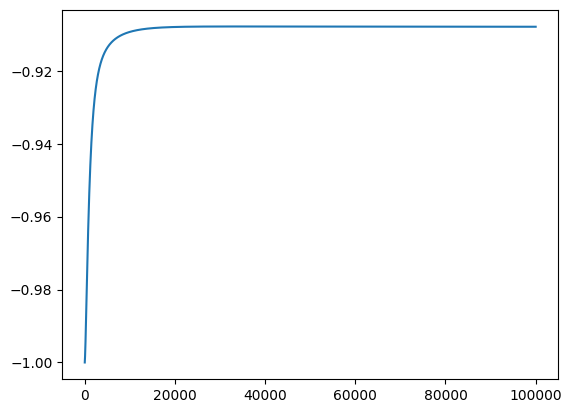

In [88]:
plt.plot(np.arange(iterations),L)
plt.show()

In [89]:
def accuracy(X, Y, W, B):
 
  Z = np.dot(W.T, X) + B
  predection = sigmoid(Z)
 #boolean
  A = predection > 0.5
 
  A = np.array(A, dtype = 'int64')
 
  acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
 
  print("Accuracy of the model is : ", round(acc, 2), "%")
  TP = np.sum((A == 1) & (Y == 1))
  FP = np.sum((A == 1) & (Y == 0))
  FN = np.sum((A == 0) & (Y == 1))

  precision = TP / (TP + FP) if (TP + FP) > 0 else 0
  recall = TP / (TP + FN) if (TP + FN) > 0 else 0
  f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

  print("F1 Score of the model is : ", round(f1_score, 2))

In [90]:
accuracy(X_te, y_te, W, B)

Accuracy of the model is :  86.25 %
F1 Score of the model is :  0.37
